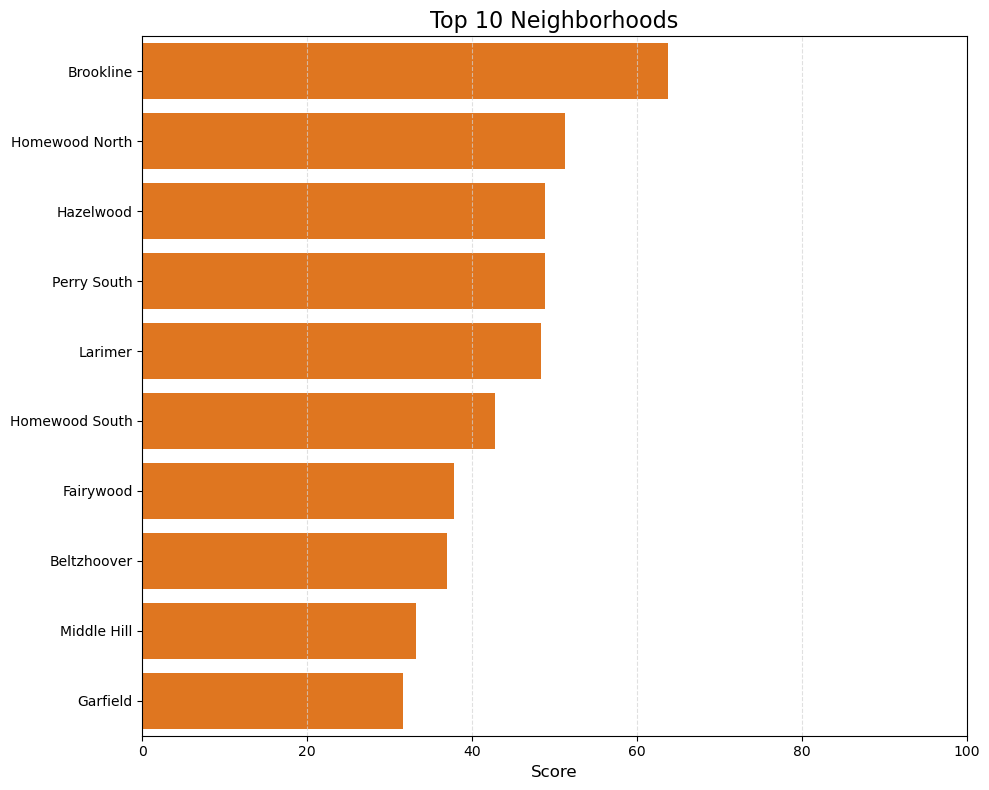

Top 10 Neighborhoods:
neighborhood_name  total_score  median_price  property_count
        Brookline    63.750000       17000.0              50
   Homewood North    51.233032        4000.0             397
        Hazelwood    48.823529        2500.0             427
      Perry South    48.785158        3034.0             407
          Larimer    48.376697        3000.0             404
   Homewood South    42.785701        3050.5             344
        Fairywood    37.794118       10000.0              37
      Beltzhoover    36.900452        2500.0             303
      Middle Hill    33.241810        3098.0             243
         Garfield    31.638824        2943.5             232


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica', 'Liberation Sans', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('chart.csv')

neighborhood_stats = df.groupby('neighborhood_name').agg(
    property_count=('sale_price', 'count'),
    avg_price=('sale_price', 'mean'),
    median_price=('sale_price', 'median')
).reset_index()


valid_neighborhoods = neighborhood_stats[neighborhood_stats['property_count'] >= 10].copy()


# nomalize for the weight
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# nomalize
valid_neighborhoods['price_score'] = normalize(valid_neighborhoods['median_price'])
valid_neighborhoods['activity_score'] = normalize(valid_neighborhoods['property_count'])

# calculate weight 60% price+ 40% activity
valid_neighborhoods['total_score'] = (valid_neighborhoods['price_score'] * 0.6 + 
                                     valid_neighborhoods['activity_score'] * 0.4) * 100

valid_neighborhoods = valid_neighborhoods.sort_values('total_score', ascending=False)

top_10 = valid_neighborhoods.head(10)

#create chart
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=top_10,
    y='neighborhood_name',
    x='total_score',
    color='#ff7300', 
    orient='h'  
)

plt.title('Top 10 Neighborhoods', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('')

plt.xlim(0, 100)

plt.grid(axis='x', linestyle='--', alpha=0.7, color='lightgray')
plt.tight_layout()

plt.show()

# print top 10
print("Top 10 Neighborhoods:")
print(top_10[['neighborhood_name', 'total_score', 'median_price', 'property_count']].to_string(index=False))

The reason why I chose value of household and number of property transactions as the key indicators to choose the best neighborhood is that the value of household can indirectly show the quality of life and how safe to live here, and their potential value. Meanwhile, the number of property transactions can show the community vitality, because frequent property transactions often indicate that the community is constantly updating and developing

Conclusion: Brooline is the best neighborhood according to my calculation. It gets 63.75. Although the property count is not big enough, its price is way higher that others. It can be noticed that Hazelwood has the cheapest price among the 10, and it has the most property count among the 10.